Fit a series of random-forest classifiers to the SPAM data,  to  explore  the  sensitivity  to m  (the  number of  randomly  selected  inputs  for each  tree).     <br> Plot  both  the  OOB  error  as  well  as  the  test  error  against  a  suitably chosen range of values for m.

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [4]:
column_list = []
for i in range(1 , 59):
    column_list.append("Column" + str(i))
spam_data = pd.read_csv("./SPAM_DATA/spam.csv", delimiter= " " , names= column_list)
# spam_data.info()
# spam_data = pd.read_csv("./SPAM_DATA/spam.csv", delimiter= " " , header = None)

In [5]:
spam_data.describe()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57,Column58
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [6]:
spam_target = spam_data.Column58
spam_predictor = spam_data.drop("Column58", axis = 1)

In [7]:
predictor_train,predictor_test,target_train,target_test=train_test_split(spam_predictor,spam_target,test_size=0.2)

In [8]:
def random_forest( trees, random_estimators):
    model = RandomForestClassifier(n_estimators = trees ,  max_features = random_estimators, oob_score = True) 
    model.fit(predictor_train, target_train)
    target_predict = model.predict(predictor_test) 
    print("OOB SCORE " , model.oob_score_)
    OOB_list.append(model.oob_score_)
    print("TEST Accuracy" , accuracy_score(target_test, target_predict))
    test_acu_list.append( accuracy_score(target_test, target_predict))
# random_forest(1000, 1)

In [9]:
OOB_list = []
test_acu_list = []
x_list = [2, 4, 5, 10]

In [18]:
OOB_list

[0.9538043478260869,
 0.9527173913043478,
 0.9532608695652174,
 0.9502717391304348]

In [19]:
test_acu_list

[0.9695982627578719,
 0.9641693811074918,
 0.9641693811074918,
 0.9641693811074918]

In [21]:
x_list

[2, 4, 5, 10]

In [10]:
random_forest(1000, 2)

OOB SCORE  0.9538043478260869
TEST Accuracy 0.9695982627578719


In [11]:
random_forest(1000, 4)

OOB SCORE  0.9527173913043478
TEST Accuracy 0.9641693811074918


In [12]:
random_forest(1000, 5)

OOB SCORE  0.9532608695652174
TEST Accuracy 0.9641693811074918


In [13]:
random_forest(1000, 10)

OOB SCORE  0.9502717391304348
TEST Accuracy 0.9641693811074918


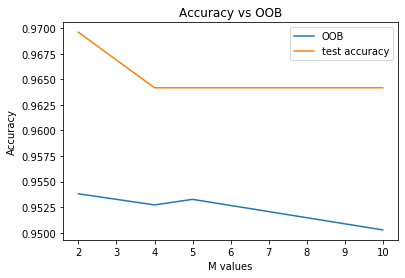

In [30]:
plt.plot(x_list, OOB_list, label='OOB')
plt.plot(x_list, test_acu_list, label='test accuracy')
plt.title('Accuracy vs OOB')
plt.legend(loc = 'best')
plt.xlabel("M values")
plt.ylabel("Accuracy")
 
plt.savefig('ACC_OOB.png')
plt.show()

https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

https://stackoverflow.com/questions/35578041/why-do-i-get-different-randomforest-outcomes-between-r-and-python

https://stackoverflow.com/questions/29290916/scikit-learn-random-forest-classifier-how-to-produce-a-plot-of-oob-error-agains